<a href="https://colab.research.google.com/github/Subhamtr01/DL_NLP/blob/main/Digit_Recognizer_deep_learning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer
### Dataset Description
Files has two dataset train and test contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.


# Table of Contents

1. Objective

2. Import the libraries

3. Define Constants

4. Dataset Description

5. Normalize data

6. One-hot encoding

7. Data augmentation

8. Model building

9. Visualize Training and Validation Accuracy & Loss

10. Make Predictions



# Objective:
To correctly identify digits from a dataset

## Call libraries

In [ ]:
# Import array-manipulation library
import pandas as pd
import numpy as np

# Import tensorflow
import tensorflow as tf
from tensorflow import keras
import tensorboard

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

import os, time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display outputs from multiple commands in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Define Constants

In [ ]:
# Set some hyperparameters

batch_size = 64   # A batch of 'batch_size' training examples is fed before
                  #  every error correction

num_epochs = 50   # Over the entire training set, we iterate 5 times
                  # Thus per epoch, there will be (X_train.shape[0]/batch_size) batches

kernel_size = 5   # we will use 3x3 kernels throughout

pool_size = 2     # we will use 2x2 pooling throughout

conv_depth_1 = 32 # we will initially have 32 filters per conv. layer...
                  # Remember each filter extracts some structure from image data

conv_depth_2 = 64 # ...switching to 64 filters after the first pooling layer

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#  Read data

path = "/gdrive/MyDrive/deeplearning/"

In [ ]:
train = pd.read_csv(path + "digit_train.csv")
test = pd.read_csv(path + "digit_test.csv")

Loading and Explore the train dataset

In [ ]:
train.shape
train.head()

(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Loading and Explore the test dataset

In [ ]:
test.shape
test.head()

(28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Display some sample images

Text(0.5, 1.0, 'Digit: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 5')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Digit: 3')

(-0.5, 27.5, 27.5, -0.5)

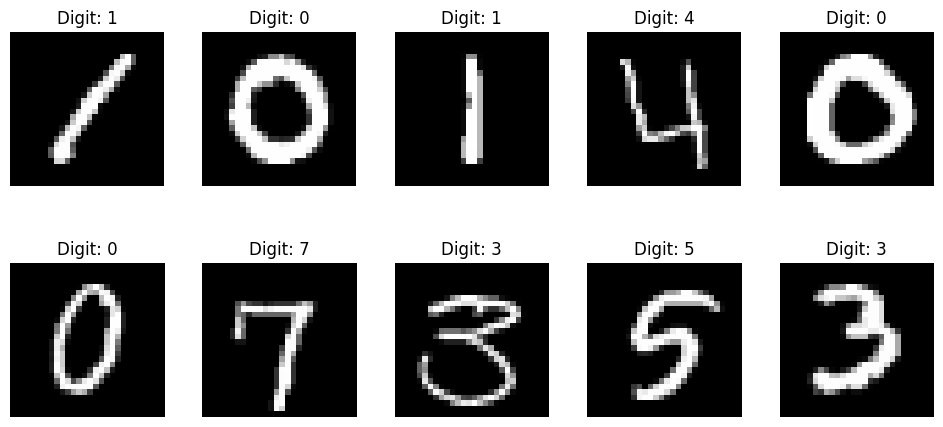

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(train.iloc[i, 1:].values.reshape(28,28), cmap='gray')
    axes[i].set_title(f"Digit: {train.iloc[i, 0]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

Split data into images and labels

In [ ]:
y_train = train['label']
X_train = train.drop('label', axis=1)

In [ ]:
# Data shapes:
X_train.shape
y_train.shape

(42000, 784)

(42000,)

## Normalize

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

#.reshape(-1, 28, 28, 1):

This reshapes the array into a 4D array with the following dimensions:

-1: This is used as a placeholder. When you we -1 in one of the dimensions, it means that the size of that dimension will be automatically inferred based on the other dimensions and the total number of elements. In this case, it allows the code to reshape the array while keeping the total number of elements constant.

28: This represents the height of each image (the images are 28x28 pixels).

28: This represents the width of each image (also 28x28 pixels).

1: This represents the number of channels. In this case, it's 1, which suggests that the images are grayscale. If the images were RGB, we would use 3 here.

## One-hot encoding

In [ ]:
y_train = to_categorical(y_train, num_classes=10)

# Data augmentation
Data augmentation is a technique used to artificially increase the diversity of the training dataset by applying various transformations to the original images. This can help improve the generalization ability of machine learning models.

rotation_range=10: This specifies a range in which random rotations (in degrees) will be applied to the images. In this case, rotations up to 10 degrees clockwise or counterclockwise may be applied.

zoom_range=0.1: This specifies a range for random zooming in and out of the images. A value of 0.1 means that the images may be zoomed in by up to 10% or zoomed out by up to 10%.

width_shift_range=0.1 and height_shift_range=0.1: These parameters define the range for horizontal and vertical shifts applied to the images. In this case, the images may be shifted horizontally or vertically by up to 10% of their width or height.

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

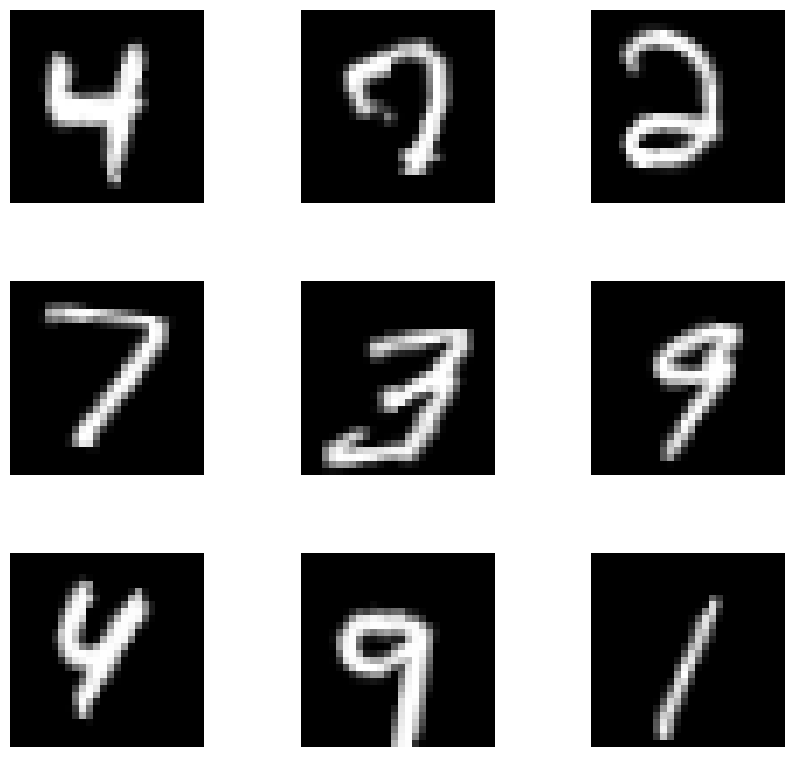

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Display augmented images
X_sample, y_sample = next(datagen.flow(X_train, y_train, batch_size=9))

fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(X_sample[i].reshape(28,28), cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()


## Model building

In [ ]:
# Define the model

model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
# Learning Rate Schedule and Early Stopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Training the model

In [ ]:
# Training the model with callbacks
batch_size = 64
epochs = 50

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_train, y_train),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[learning_rate_reduction, early_stop])     # Total Batches = Total Dataset Size / Batch Size : 42000/64=656

Epoch 1/50
656/656 [==============================] - 78s 118ms/step - loss: 0.3337 - accuracy: 0.8958 - val_loss: 0.0613 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 2/50
656/656 [==============================] - 93s 142ms/step - loss: 0.1025 - accuracy: 0.9682 - val_loss: 0.0366 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 3/50
656/656 [==============================] - 79s 120ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.0317 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 4/50
656/656 [==============================] - 82s 125ms/step - loss: 0.0610 - accuracy: 0.9813 - val_loss: 0.0210 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 5/50
656/656 [==============================] - 83s 126ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0315 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 6/50
656/656 [==============================] - 84s 128ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.0167 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 7/50
656/656 [==============================] 

# Visualize Training and Validation Accuracy & Loss

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

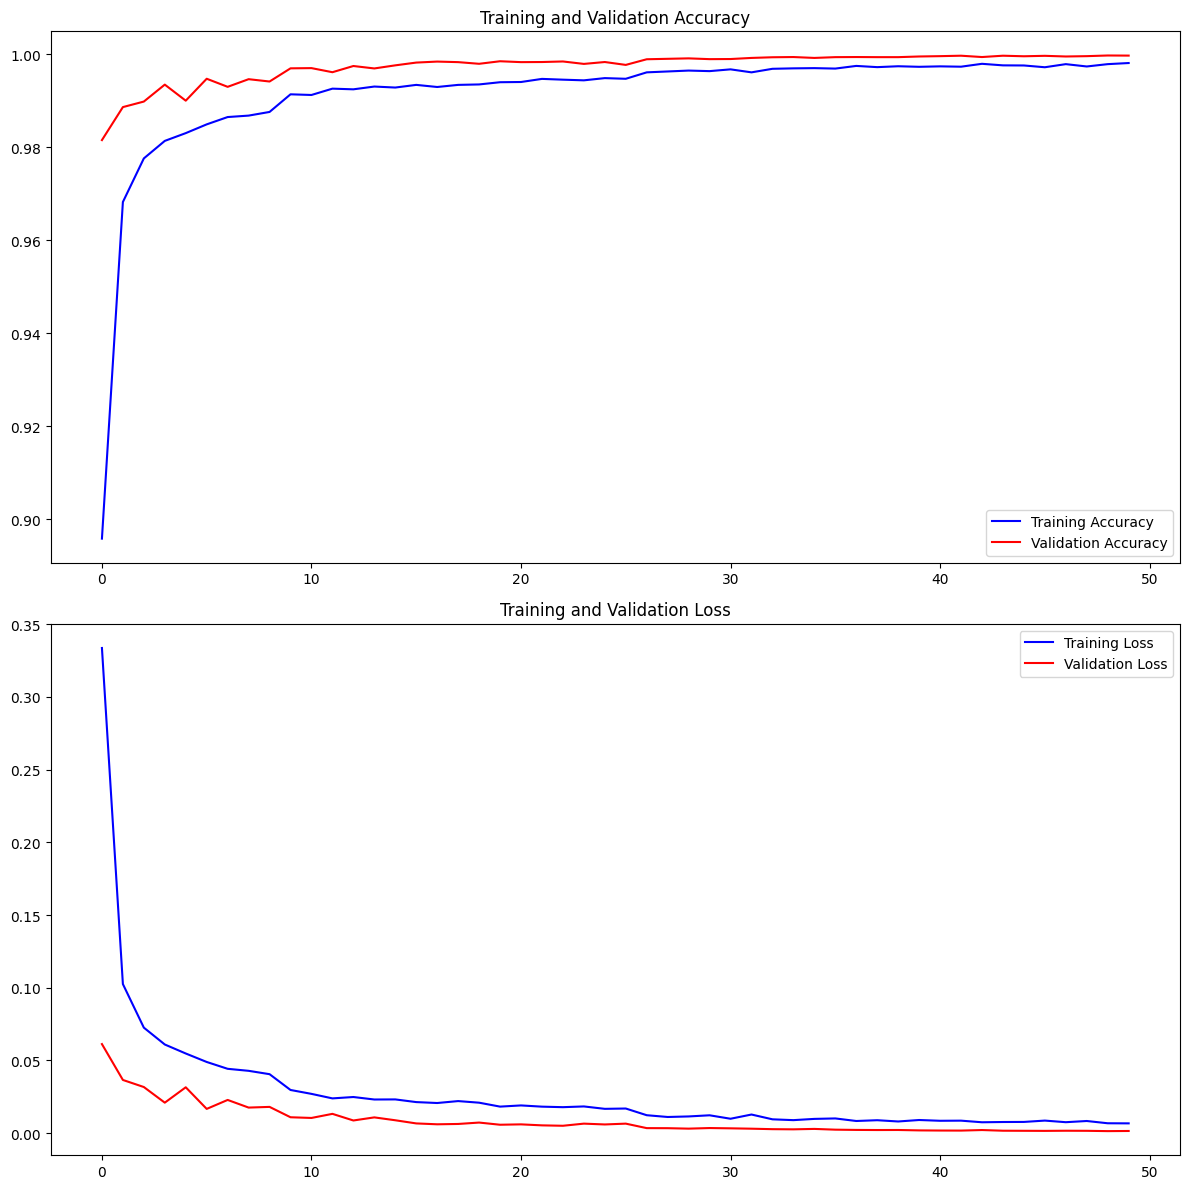

In [ ]:
# Visualize Training and Validation Accuracy & Loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='best')

ax2.plot(history.history['loss'], color='b', label='Training Loss')
ax2.plot(history.history['val_loss'], color='r', label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Learning Rate Schedule')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Learning Rate')

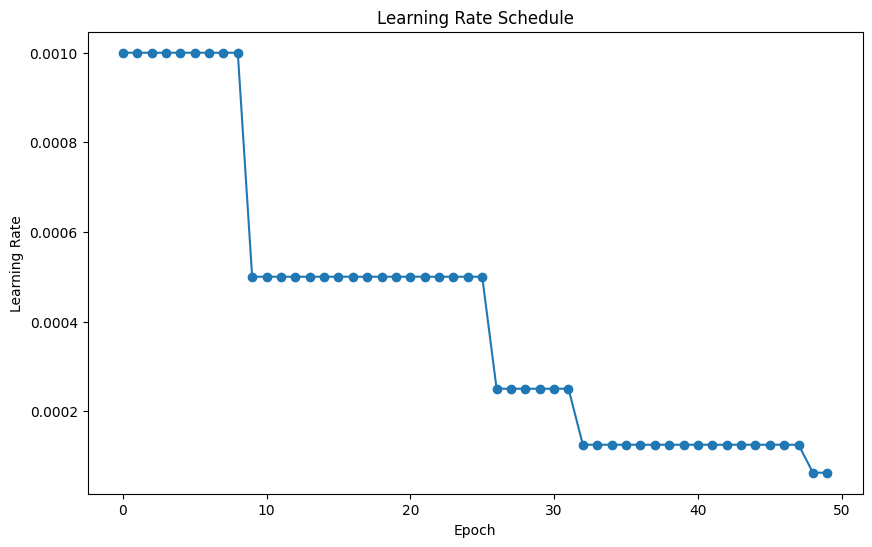

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['lr'], marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


## Make Predictions

In [ ]:
predictions = model.predict(test)


875/875 [==============================] - 12s 13ms/step


In [ ]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

submission = pd.DataFrame({
    'ImageId': range(1, len(predictions)+1),
    'Label': predictions
})



875/875 [==============================] - 11s 13ms/step


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


## Kaggle score - 0.99528 out of 1